In [10]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from preprocess import * 
import xgboost
import umap
import umap.plot
import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv(os.path.join("data", "train.csv"))
train_data["description"].fillna("", inplace=True)
train_data["host_is_superhost"].fillna("f", inplace=True)
train_data["beds"].fillna("1", inplace=True)
print(train_data.shape)
train_data.dropna(inplace=True)
print(train_data.shape)

(15441, 48)
(15433, 48)


## Histogram of price distribution

(array([4010., 2882., 2633., 2752., 1911., 1245.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

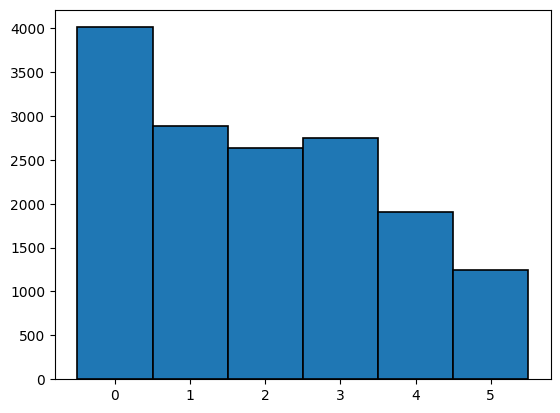

In [11]:
plt.hist(train_data["price"], range(0, 7), edgecolor='black', linewidth=1.2, align='left')

## Boxplots of feature distributions

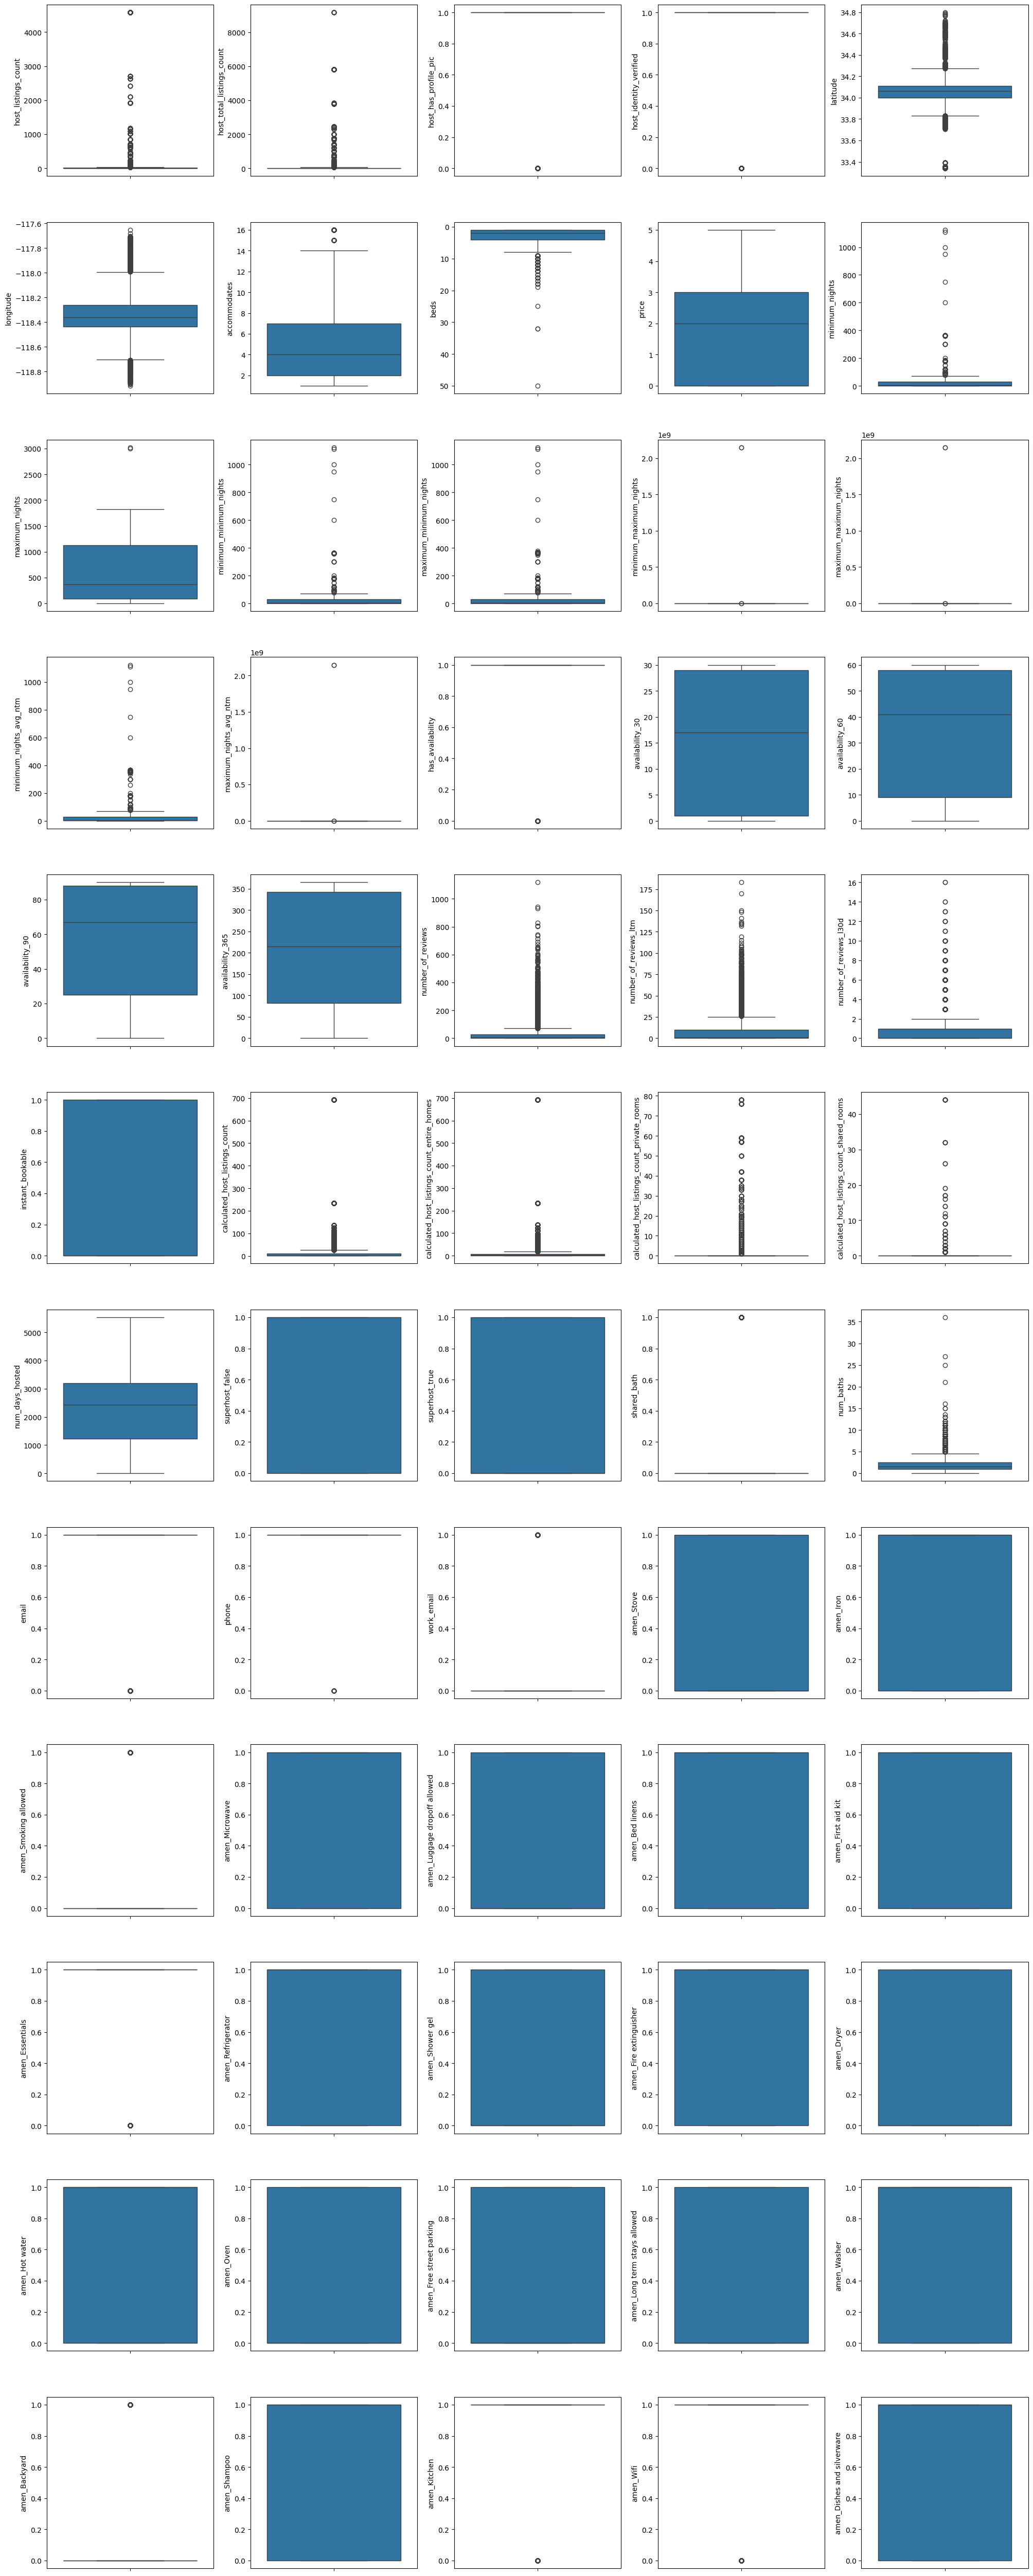

In [15]:
X = preprocess(train_data) 

fig, axs = plt.subplots(ncols=5, nrows=12, figsize=(20, 50))
index = 0
axs = axs.flatten()  
for k,v in X.items():
    sns.boxplot(y=k, data=X, ax=axs[index])
    index += 1
    if index >= 60: 
        break
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Most Representative Amenities for Each Class

In [3]:
import ast

data = []
for p in range(6):
    total_amenities = []
    df = train_data[train_data['price'] == p]
    for amenity_list in df["amenities"]: 
        total_amenities += ast.literal_eval(amenity_list)
    data.append(total_amenities)
    
import nltk
from collections import Counter
# nltk.download('punkt')
# nltk.download('words')
# nltk.download('stopwords')

from nltk.corpus import words as nltk_words
from nltk.corpus import stopwords

all_dicts = [Counter(amen) for amen in data]

# Combine all word counts
combined_counts = Counter()
for d in all_dicts:
    combined_counts.update(d)

# Analyze frequency differences to find distinctive words
distinctive_words = {i: [] for i in range(1, len(all_dicts) + 1)}

for word in combined_counts:
    counts = [d.get(word, 0) for d in all_dicts]
    max_count = max(counts)
    if counts.count(max_count) == 1:  # Word is most frequent in only one dictionary
        source_index = counts.index(max_count)
        distinctive_words[source_index + 1].append(word)

out = [] 
# Print the distinctive words for each source
for source, words in distinctive_words.items():
    print(f"Source {source}: {words[:3]}")
    out += words[:50]

Source 1: ['Stove', 'Iron', 'Smoking allowed']
Source 2: ['Paid parking on premises', 'Elevator', 'Coffee maker: Keurig coffee machine']
Source 3: ['EV charger - level 1', 'LG refrigerator', '55" HDTV with Netflix']
Source 4: ['Window guards', 'Bathtub', 'Pets allowed']
Source 5: ['Bosch stainless steel gas stove', 'Bluetooth sound system', 'Private hot tub']
Source 6: ['Outdoor shower', 'Pool', 'Hot tub']


## Correlation of Each Feature with Price

In [11]:
data_info = train_data.info()

# Checking for columns with high correlation with the 'price' column
correlation = train_data.corr()['price'].sort_values(ascending=False)

# Displaying the summary information and the correlation values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_info, correlation)



<class 'pandas.core.frame.DataFrame'>
Index: 14675 entries, 0 to 15440
Columns: 229 entries, host_id to Unincorporated Areas
dtypes: bool(7), float64(10), int64(208), object(4)
memory usage: 25.6+ MB
None price                                                                                                      1.000000
num_bedroom                                                                                                0.590405
accommodates                                                                                               0.574787
num_baths                                                                                                  0.567370
beds                                                                                                       0.503730
Entire home/apt                                                                                            0.273548
amen_Private hot tub                                                                               